###### TODO:

1.  Take MBDNL as the reference to quantify the error ( user relative error )

2.  Check for Cu and Alkaline Earth metals

3.  Find formal charges by beggar's analysis in MBDNL optimised geometry

4.  Consider absolute electronegetiy of each elements present also as a fetaure function ( for the mettalic things )

5.  Polarisibility 



In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
copper = pd.read_csv('d3/Cu.csv')
copper_mbd = pd.read_csv('mbd/Cu_mbdnl.csv')

LiHd = pd.read_csv('d3/LiH.csv')
LiHmbd = pd.read_csv('mbd/LiH.csv')

In [200]:
copper_mbd.head()

,cell_length,energy,E-dispersion
0,2.777431,14.479846,-3.56830
1,2.977431,-3.002095,-3.18611
2,3.177431,-11.667733,-2.84942
3,3.377431,-15.462080,-2.55013
4,3.577431,-16.579741,-2.27569


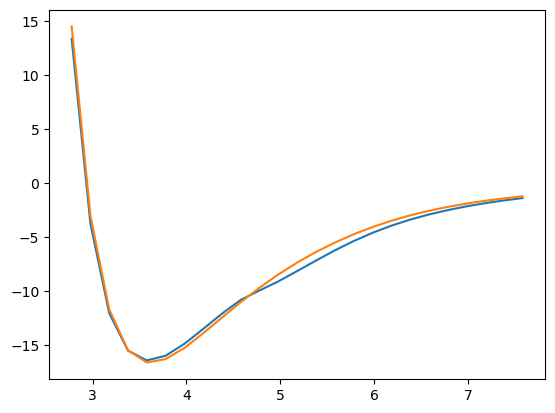

In [201]:
# plt.plot(cuppor['cell_length'], cuppor['energy'], 'o')
plt.plot(copper['cell_length'], copper['energy'])

# plt.plot(copper_mbd['cell_length'], copper_mbd['energy'], 'o')
plt.plot(copper_mbd['cell_length'], copper_mbd['energy'])

plt.show()

In [202]:
offset = copper_mbd['energy'][6] - copper['energy'][6]

diffs = copper_mbd['energy'] - copper['energy']

diffs = diffs - offset
cols = ['distance','energy']

cu = pd.DataFrame({
    'distance': copper['cell_length'].reset_index(drop=True),
    'energy': diffs.reset_index(drop=True)
})


max(cu['energy'])
cu

,distance,energy
0,2.777431,1.523881
1,2.977431,1.123815
2,3.177431,0.740245
3,3.377431,0.402150
4,3.577431,0.191466
5,3.777431,0.072015
6,3.977431,0.000000
7,4.177431,-0.016271
8,4.377431,0.022903
9,4.577431,0.172221


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

def compare_energy_data_with_regression(data1, data2, offset_ref_index=(0, 6), degree=3):
    """
    Compare energy differences between two datasets with different cell lengths
    and find the minimum value of the energy difference using polynomial regression.

    Parameters:
        data1 (pd.DataFrame): First dataset with 'cell_length' and 'energy' columns.
        data2 (pd.DataFrame): Second dataset with 'cell_length' and 'energy' columns.
        offset_ref_index (tuple): A tuple specifying indices for offset calculation 
                                  (index for data1['energy'], index for data2['energy']).
        degree (int): Degree of the polynomial for regression. Default is 3.
    
    Returns:
        float: Minimum energy difference from the polynomial regression curve.
    """
    # Calculate offset
    offset = data1['energy'][offset_ref_index[0]] - data2['energy'][offset_ref_index[1]]
    
    # Interpolate data2's energy values at data1's cell_length points
    data2_interp = np.interp(data1['cell_length'], data2['cell_length'], data2['energy'])
    
    # Calculate the difference in energy values
    energy_diff = data1['energy'] - data2_interp - offset
    
    # Prepare the result DataFrame
    result = data1.copy()
    result['energy_diff'] = energy_diff
    result['data2_interp'] = data2_interp

    # Fit a polynomial regression to the energy difference
    p_coeff = np.polyfit(result['cell_length'], result['energy_diff'], degree)
    poly = np.poly1d(p_coeff)

    # Generate finer cell length values for extrapolation
    fine_cell_lengths = np.linspace(min(result['cell_length']), max(result['cell_length']), 500)
    energy_diff_fine = poly(fine_cell_lengths)
    
    # Find the minimum value of the polynomial regression curve
    min_index = np.argmin(energy_diff_fine)
    min_cell_length = fine_cell_lengths[min_index]
    min_energy_diff = energy_diff_fine[min_index]

    # Plot the original data
    plt.figure(figsize=(10, 6))
    plt.plot(result['cell_length'], result['energy_diff'], label='Energy Difference (Original)', marker='o')
    plt.plot(fine_cell_lengths, energy_diff_fine, label=f'Polynomial Fit (Degree {degree})', linestyle='--')
    plt.axvline(min_cell_length, color='r', linestyle=':', label=f'Minimum at {min_cell_length:.3f}')
    plt.axhline(min_energy_diff, color='g', linestyle=':', label=f'Min Energy Diff: {min_energy_diff:.3e}')

    # Add labels and legend
    plt.xlabel('Cell Length')
    plt.ylabel('Energy Difference')
    plt.title('Energy Difference and Polynomial Regression')
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()

    return min_energy_diff


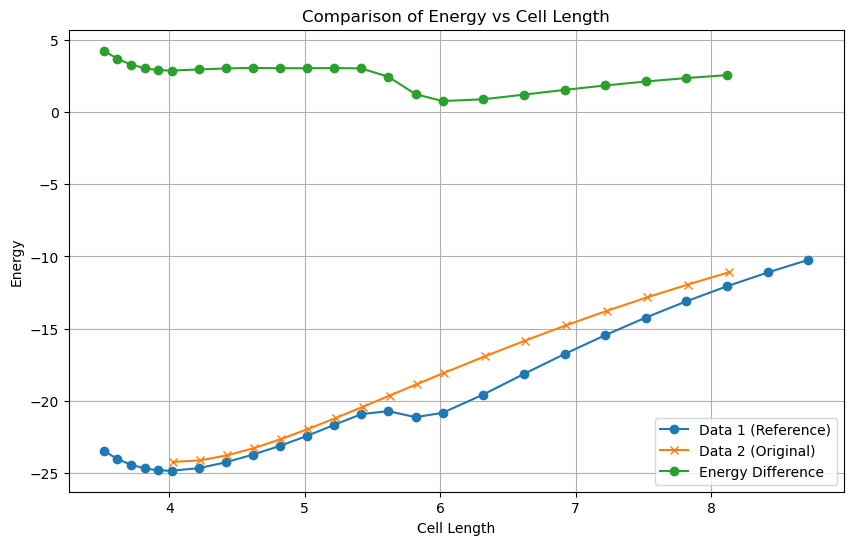

3.0404570477360977

In [215]:

compare_energy_data(LiHd,LiHmbd,offset_ref_index=(6,6))

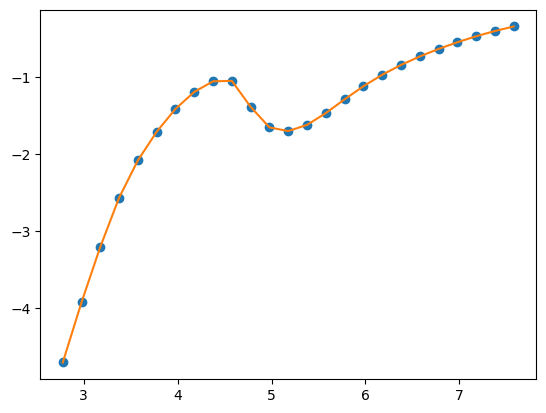

In [205]:
plt.plot(copper['cell_length'], copper['E-dispersion'], 'o')
plt.plot(copper['cell_length'], copper['E-dispersion'])
plt.show()

In [206]:
import itertools
import numpy as np

def generate_combinations(params, param_names, operators):
    results = []

    # Generate all subsets of parameters (combinations)
    for r in range(1, len(params) + 1):
        for subset_indices in itertools.permutations(range(len(params)), r):  # Permutations of parameter indices
            subset = [params[i] for i in subset_indices]
            subset_names = [param_names[i] for i in subset_indices]

            if len(subset) == 1:
                expr_str = subset_names[0]
                expr_val = subset[0]
                results.append((expr_str, expr_val))
            else:
                for ops in itertools.product(operators, repeat=len(subset) - 1):
                    # Construct the expression as a string
                    expr_str = subset_names[0]
                    expr_val = subset[0]

                    for i in range(len(ops)):
                        expr_str += f" {ops[i]} {subset_names[i + 1]}"
                        if ops[i] == '*':
                            expr_val = expr_val * subset[i + 1]
                        elif ops[i] == '/':
                            expr_val = expr_val / subset[i + 1]
                    results.append((expr_str, expr_val))

    return results


In [207]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = np.array([9, 10, 11, 12])
d = np.array([13, 14, 15, 16])
e = np.array([13, 14, 15, 16])
parameters = [a, b, c, d,e]
param_names = ['a', 'b', 'c', 'd','e']

# Define mathematical operators
operators = ['*', '/',]

# Generate and evaluate all expressions
all_expressions = generate_combinations(parameters, param_names, operators)

df = pd.DataFrame(all_expressions, columns=['Expression', 'Value'])

df.shape

(3165, 2)

In [208]:

values_dict = {expr_str: expr_val for expr_str, expr_val in all_expressions}
values = pd.DataFrame(values_dict)

In [209]:
values.head()

correlation = values.corr()

correlation = correlation[correlation['a'] == 1]
correlation.tail()

,a,b,c,d,e,a * b,a / b,a * c,a / c,a * d,...,e * d / c / b * a,e * d / c / b / a,e / d * c * b * a,e / d * c * b / a,e / d * c / b * a,e / d * c / b / a,e / d / c * b * a,e / d / c * b / a,e / d / c / b * a,e / d / c / b / a
e * b / d,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
e * c / d,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
e / d * a,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
e / d * b,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
e / d * c,1.0,1.0,1.0,1.0,1.0,0.995098,0.990366,0.997642,0.996347,0.998619,...,0.996329,-0.9207,0.988243,-0.909025,0.999208,-0.924165,0.999353,-0.932423,0.958726,-0.912158
